# 目标
- 学习如何用霍夫变换检测图像中的圆。
- 涉及函数：**cv2.HoughCircles()**

# 1. 理论
一个圆的数学表示为：$(x-x_{center})^2 + (y-y_{center})^2=r^2$，其中$(x_{center},y_{center})$是圆心，$r$是圆的半径。一个圆可以用三个参数来表示，因此需要一个三维的累加器用于霍夫变换，这样的效率太低。因此在OpenCV中采用了更有技巧的方法：**霍夫梯度方法**，该方法利用了边缘的梯度信息。

利用**cv2.HoughCircles()**可以进行圆的检测，该函数有很多参数：
- **method** - 目前只实现了**CV_HOUGH_GRADIENT**。
- **dp** - 图像分辨率与累加器分辨率的比值，如果dp=1则二者相同，若dp=2则累加器分辨率只有图像分辨率的一半。
- **minDist** - 检测到的圆之间的最小距离。
- **param1** - 是Canny边缘检测中较大的那个参数，较小的参数是该值的一半。
- **param2** - 是累加器的阈值，决定了至少要多少票才能被选中。
- **minRadius** - 最小的圆半径。
- **maxRadius** - 最大的圆半径。

In [1]:
from __future__ import print_function
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

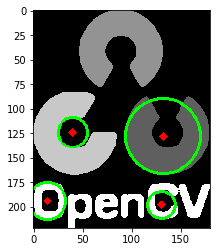

In [2]:
img = cv2.imread('../data/opencv-logo-white.png', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                          param1=150, param2=30, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # 绘制圆
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # 绘制圆心
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.imshow(cimg[:, :, ::-1])